<a href="https://colab.research.google.com/github/kevin3302/Term-Deposit-Prediction/blob/main/Term_Deposit_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Term Deposit Prediction Project : Classification


## Importing the Libraries

In [ ]:
# importing libraries
import pandas as pd
import numpy as np                     # For mathematical calculations
import seaborn as sns                  # For data visualization
import matplotlib.pyplot as plt 
import seaborn as sn                   # For plotting graphs
%matplotlib inline
import warnings                        # To ignore any warnings
warnings.filterwarnings("ignore")

In [ ]:
# loading the data
train = pd.read_csv('/train.csv')

In [ ]:
#printing first five rows of the dataset
train.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


Features that are present in our data set and their data types.

In [ ]:
train.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

We have 17 independent variables and 1 target variable, i.e. subscribed in the train dataset. We will predict the subscribed with the help of model built using the train data.

In [ ]:
# Print data types for each variable
train.dtypes

ID             int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

We can see there are two format of data types:

1. **object**: Object format means variables are categorical. Categorical variables in our dataset are: job, marital, education, default, housing, loan, contact, month, poutcome, subscribed

2. **int64**: It represents the integer variables. Integer variables in our dataset are: ID, age, balance, day, duration, campaign, pdays, previous

Shape of the dataset.

In [ ]:
train.shape

(31647, 18)

In [ ]:
train['ID'].value_counts().sum()

31647

Remove the ID variable as there are only unique values in it.

In [ ]:
# no unique ID's so drop ID column
train.drop(columns = ['ID'], inplace=True)

In [ ]:
# check for null values
train.isnull().sum()

age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

## Univariate Analysis

Now Let's look at the distribution of our target variable, i.e. subscribed. As it is a categorical variable, let us look at its frequency table, percentage distribution and bar plot.

In [ ]:
train['subscribed'].value_counts()

no     27932
yes     3715
Name: subscribed, dtype: int64

In [ ]:
# Normalize can be set to True to print proportions instead of number 
train['subscribed'].value_counts(normalize=True)

no     0.882611
yes    0.117389
Name: subscribed, dtype: float64

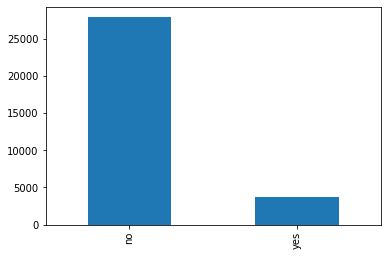

In [ ]:
# plotting the bar plot of frequencies
train['subscribed'].value_counts().plot.bar()

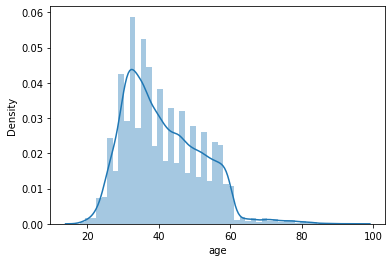

In [ ]:
sn.distplot(train["age"])

We can infer that most of the clients fall in the age group between 20-60.

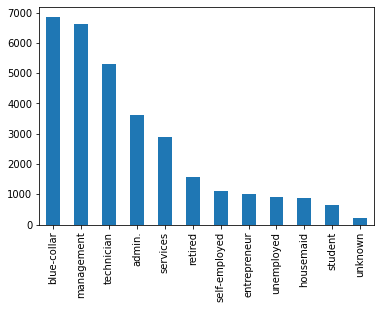

In [ ]:
train['job'].value_counts().plot.bar()

Most of the clients belongs to blue-collar job and the students are least.

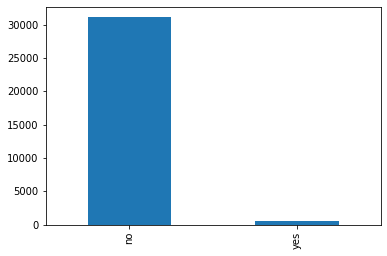

In [ ]:
train['default'].value_counts().plot.bar()

## Bivariate Analysis

subscribed       no  yes
job                     
admin.         3179  452
blue-collar    6353  489
entrepreneur    923   85
housemaid       795   79
management     5716  923
retired        1212  362
self-employed   983  140
services       2649  254
student         453  182
technician     4713  594
unemployed      776  129
unknown         180   26


Text(0, 0.5, 'Percentage')

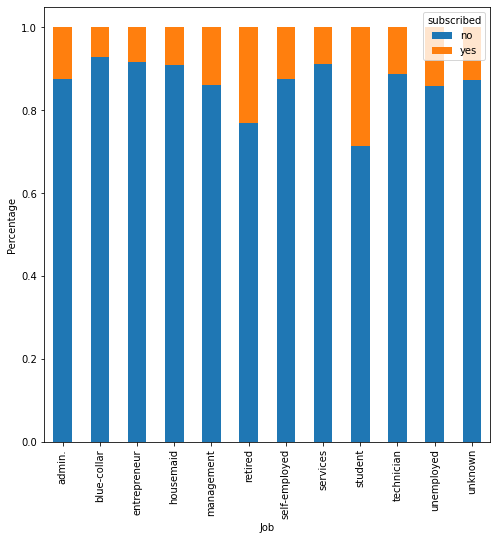

In [ ]:
print(pd.crosstab(train['job'],train['subscribed']))

job=pd.crosstab(train['job'],train['subscribed'])
job.div(job.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(8,8))
plt.xlabel('Job')
plt.ylabel('Percentage')

From the above graph we can infer that students and retired people have higher chances of subscribing to a term deposit.

Next, let's explore the default variable against the subscribed variable.

subscribed     no   yes
default                
no          27388  3674
yes           544    41


Text(0, 0.5, 'Percentage')

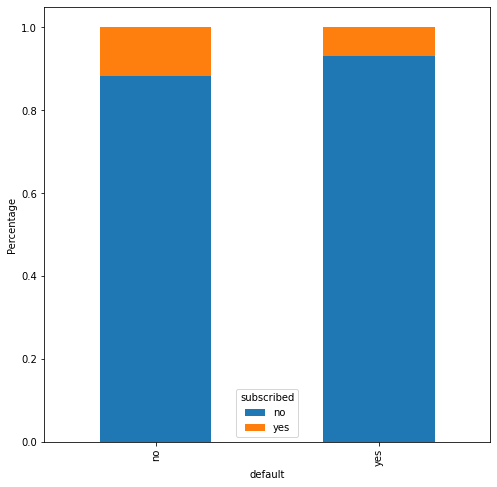

In [ ]:
print(pd.crosstab(train['default'],train['subscribed']))

default=pd.crosstab(train['default'],train['subscribed'])
default.div(default.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(8,8))
plt.xlabel('default')
plt.ylabel('Percentage')

In [ ]:
train['subscribed'].replace('no', 0,inplace=True)
train['subscribed'].replace('yes', 1,inplace=True)

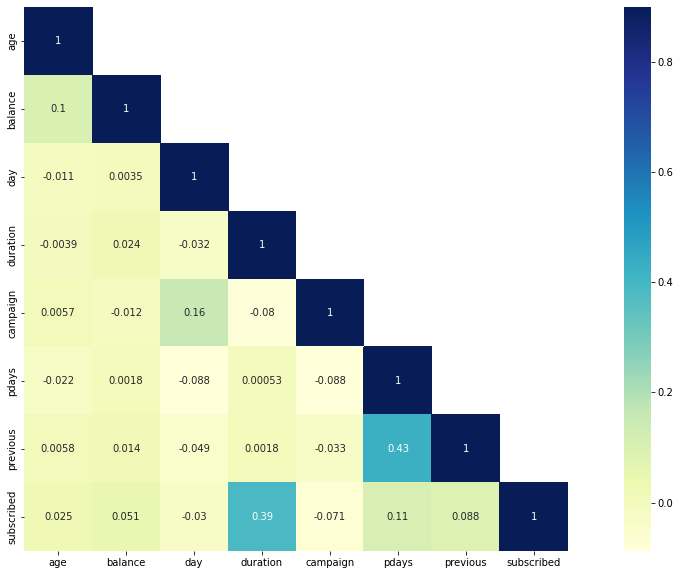

In [ ]:
corr = train.corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sn.heatmap(corr, mask=mask,vmax=.9, square=True,annot=True, cmap="YlGnBu")

We can infer that duration of the call is highly correlated with the target variable. 

As the sklearn models takes only numerical input, we will convert the categorical variables into numerical values using Label Encoding.

In [ ]:
train.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [ ]:
d = dict(train.dtypes)
catCols = []
for i in d :
  if d[i] == 'object' :
    catCols.append(i)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
for i in catCols :
  train[i] = le.fit_transform(train[i])

## Model Building

In [ ]:
target = train['subscribed']
train = train.drop('subscribed',1)

We will split the train data into training and test set so that we will be able to test the results of our model on the test set. We will keep 20% data as test set and rest as the training set. 

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# splitting into train and test with 20% data in test set and 80% data in train set.
x_train, x_test, y_train, y_test = train_test_split(train, target, test_size = 0.2, random_state=12)

Logistic regression is used for classification problems.

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# defining the logistic regression model
lreg = LogisticRegression()

In [ ]:
# fitting the model on  X_train and y_train
lreg.fit(x_train,y_train)

LogisticRegression()

In [ ]:
# making prediction on the validation set
prediction = lreg.predict(x_test)

The performance metric for this problem is accuracy_score

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
# calculating the accuracy score
accuracy_score(y_test, prediction)*100

88.62559241706161

In [ ]:
plt.plot(y_test[:500], c="orange", label="Actual Data")
plt.plot(prediction[:500], c="blue", label="Predicted Data")
plt.legend()
plt.show()

NameError: ignored

accuracy score is of around 89% on the test dataset.

## Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# defining the decision tree model with depth of 4, you can tune it further to improve the accuracy score
clf = DecisionTreeClassifier(max_depth=4, random_state=0)

In [ ]:
# fitting the decision tree model
clf.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [ ]:
# making prediction on the validation set
predict = clf.predict(x_test)

In [ ]:
# calculating the accuracy score
accuracy_score(y_test, predict)*100

88.8309636650869

## Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier()

In [ ]:
# fitting the decision tree model
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
# making prediction on the validation set
prediction = rfc.predict(x_test)

In [ ]:
# calculating the accuracy score
accuracy_score(y_test, prediction)*100

90.42654028436019

## XGBoost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgbc = XGBClassifier()

In [ ]:
# fitting the decision tree model
xgbc.fit(x_train, y_train)

XGBClassifier()

In [ ]:
# making prediction on the validation set
prediction = xgbc.predict(x_test)

In [ ]:
# calculating the accuracy score
accuracy_score(y_test, prediction)*100

90.1263823064771